In [725]:
############### NOTES ###############
# PCA
# preprocessing pipeline --> think about it

In [726]:
import os
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss, roc_auc_score, brier_score_loss

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [727]:
os.chdir("C:\\Users\\A459648\\dsprojects\\porto-seguro-safe-driver-prediction")
#os.chdir("C:\\Users\\micha\\ds_data\\porto-seguro-safe-driver-prediction")

In [728]:
cdir = os.getcwd()

In [729]:
pd.set_option('display.max_columns', 100)  # or 1000
# pd.set_option('display.max_colwidth', None)  # or 199
pd.set_option('display.max_rows', 100)  # or 1000
# pd.set_option('display.max_colwidth', None)  # or 199

# pd.reset_option('all')

In [730]:
train_df = pd.read_csv(cdir + "\\" + "train.csv")

### First look at dataset

In [731]:
train_df.head(10)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
5,19,0,5,1,4,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,1.8,2.332649,10,0,-1,0,0,14,1,1,0,1,104,2,0.445982,0.879049,0.406202,3.000000,0.7,0.8,0.4,3,1,8,2,11,3,8,4,2,0,9,0,1,0,1,1,1
6,20,0,2,1,3,1,0,0,1,0,0,0,0,0,0,0,8,1,0,0,0.6,0.1,0.617454,6,1,-1,0,1,11,1,1,0,1,99,2,0.316228,0.639683,0.368782,3.162278,0.2,0.6,0.5,2,2,8,1,8,3,10,3,0,0,10,0,1,0,0,1,0
7,22,0,5,1,4,0,0,1,0,0,0,0,0,0,0,0,13,1,0,0,0.7,0.4,0.607248,11,1,0,0,0,11,1,1,2,1,30,3,0.446990,0.900574,0.374833,3.316625,0.1,0.5,0.1,1,2,7,1,6,1,13,7,1,3,6,1,0,1,0,1,0
8,26,0,5,1,3,1,0,0,0,1,0,0,0,0,0,0,6,1,0,0,0.9,0.7,0.901388,10,1,-1,0,1,14,1,1,0,1,68,3,0.400000,0.780641,0.407431,2.828427,0.9,0.8,0.6,3,1,7,3,9,4,11,4,2,1,5,0,1,0,0,0,1
9,28,1,1,1,2,0,0,0,1,0,0,0,0,0,0,0,4,0,0,1,0.9,1.4,2.316652,11,0,0,1,0,14,1,1,2,1,104,2,0.447214,1.458184,0.390256,3.605551,0.7,0.8,0.8,2,2,8,2,9,1,11,3,5,0,6,0,1,0,0,1,0


In [732]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [733]:
# drop id
train_df = train_df.drop(columns=["id"])

In [734]:
# used for random state parameter on later stages
random_state = 12

## Data Cleaning

### Missing value check

In [735]:
# -1 for each col represents missing value

missing_values = train_df.apply(lambda col: (col == -1).sum())
print(missing_values)

target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0
ps_calc_02             0


In [736]:
def fnImputeMissingValuesInDf(df, missing_value):

    # SimpleImputer for missing value imputation
    imp = SimpleImputer(missing_values=-1, strategy="most_frequent")
    
    missing_values = train_df.apply(lambda col: (col == missing_value).sum())
    #print(missing_values)

    # list of columns with missing values
    cols_with_missing_values = [index for index, value in missing_values.items() if value > 0]
    # print(cols_with_missing_values)

    # replace missing values in specific columns
    df[cols_with_missing_values] = imp.fit_transform(df[cols_with_missing_values])

    return df

In [737]:
train_df = fnImputeMissingValuesInDf(train_df, -1)

### Removing duplicates

In [738]:
# count rows in train_df before dropping duplicates
print(f"Count rows before dropping duplicates: {len(train_df)}")

train_df = train_df.drop_duplicates()
print(f"Count rows after dropping duplicates: {len(train_df)}")

Count rows before dropping duplicates: 595212
Count rows after dropping duplicates: 595212


Dataset does not contain any duplicates.

### Data imbalance check

In [739]:
# groupby target
train_df.groupby(by="target").size()

target
0    573518
1     21694
dtype: int64

21694 insured car owners filed a claim. \
573518 insured car owners did not file a claim.

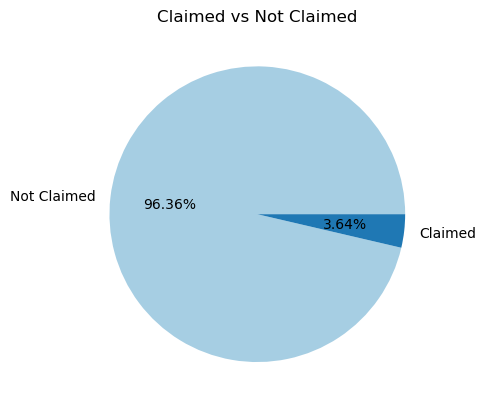

In [740]:
labels=["Not Claimed", "Claimed"]

claimed_or_not = train_df["target"].value_counts().tolist()
values = [claimed_or_not[0],claimed_or_not[1]]
colors = sns.color_palette("Paired")

plt.pie(values, labels=labels, colors=colors, autopct='%.2f%%')
plt.title("Claimed vs Not Claimed")
plt.show()

##### Dataset is imbalanced.
Insured car owners who did not file a claim represent 96.36% of total insured car owners.\
Insured car owners who filed a claim represent 3.64% of total insured car owners.

### Listing features as categorical or numerical

In [741]:
# to get proper split of features, commentary provided by Kaggle competition host was used. See 'Data' section in competation link.

# categorical features
cat_col_names =  [col for col in train_df.columns if 'cat' in col or 'bin' in col]
# cat_col_names

# continuous features
cont_col_names = ["ps_reg_01", "ps_reg_02",	"ps_reg_03", "ps_car_12", "ps_car_13", "ps_car_14", "ps_car_15", "ps_calc_01", "ps_calc_02", "ps_calc_03"]
# cont_col_names

# ordinal features
ordinal_col_names = [col for col in train_df.columns if col not in cat_col_names and col not in cont_col_names]
# ordinal_col_names

# check if all column names are added to lists
print(f"Count of all lists' elements: {len(cat_col_names) + len(cont_col_names) + len(ordinal_col_names)}")
print(f"Count of all columns from X df: {len(train_df.columns.tolist())}")

Count of all lists' elements: 58
Count of all columns from X df: 58


In [742]:
# add ordinal features to categorical features list
cat_col_names = cat_col_names + ordinal_col_names
#print(cat_col_names)

# treat continuous features as numerical features
num_col_names = cont_col_names
# print(num_col_names)

## Data Splitting

In [743]:
# split train_df to X and y dataframes
X, y = train_df.iloc[:,1:], train_df.iloc[:,[0]]

In [744]:
# stratify=y to keep same proportions of classes for target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)

In [745]:
# keep X_train, y_train as a single dataframe for further operations
train_df = pd.concat([X_train, y_train], axis=1)

print(train_df.shape)

(476169, 58)


## Outliers detection and potential removal

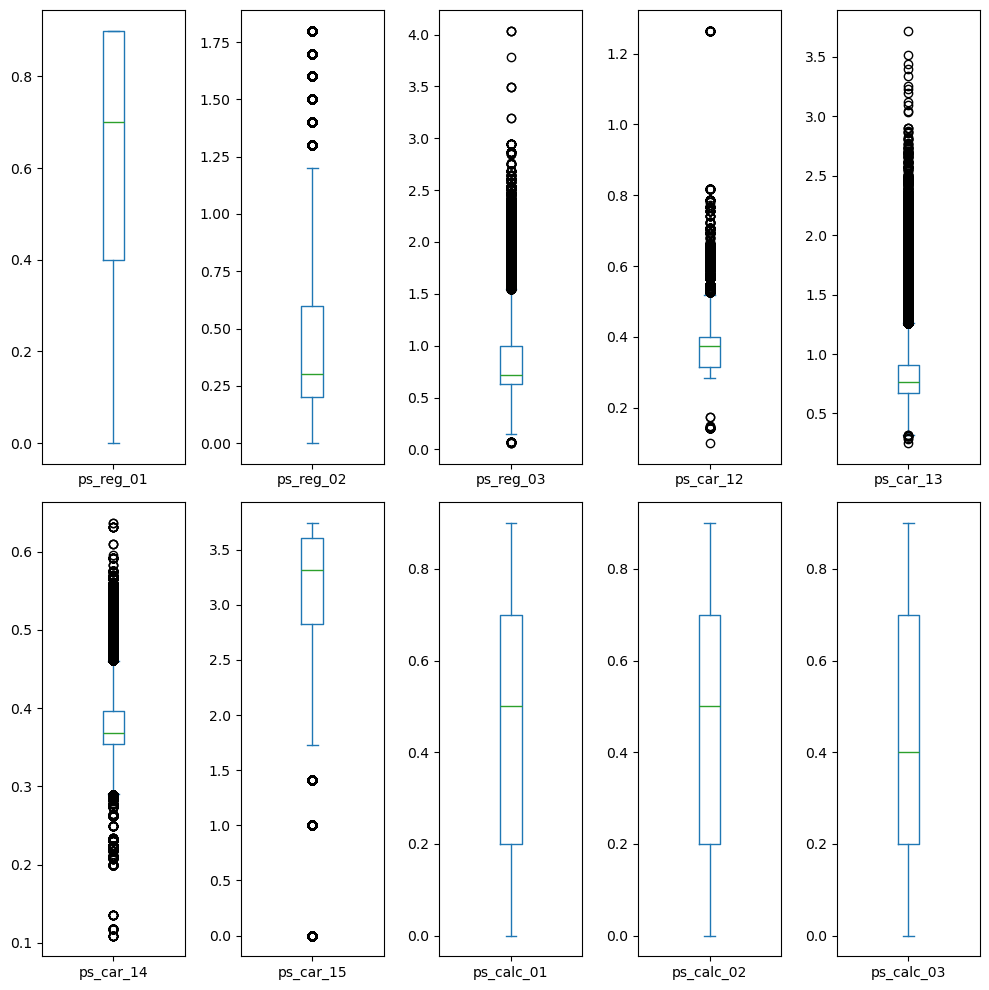

In [746]:
# boxplots to visualize if any outliers appear for numerical columns
train_df[num_col_names].plot(kind='box', layout=(2,5), subplots=True, figsize=(10, 10))
plt.tight_layout()  
plt.show()

In [747]:
# IQR
def fnDetectOutliers(df, n, num_cols):
    
    outlier_indices = []

    for col in num_cols:
        
        Q1 = np.percentile(df[col], 25)
        Q3 = np. percentile(df[col], 75)
        IQR = Q3-Q1
        outlier_step = 1.5 * IQR

        # indices of outliers in a col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index

        outlier_indices.extend(outlier_list_col)

    # select rows with more than n outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)

    return multiple_outliers

In [748]:
# list rows to be dropped if at least 3 outlier values appear for a specific row
outliers_to_drop = fnDetectOutliers(train_df, 3, num_col_names)

# drop outliers from copied dataframe
train_df_dropped_outliers = train_df.copy()
train_df_dropped_outliers = train_df_dropped_outliers.drop(outliers_to_drop, axis=0).reset_index(drop=True)

In [749]:
print("train_df shape: ",train_df.shape)
print("train_df shape if outliers dropped: ",train_df_dropped_outliers.shape)

train_df shape:  (476169, 58)
train_df shape if outliers dropped:  (474835, 58)


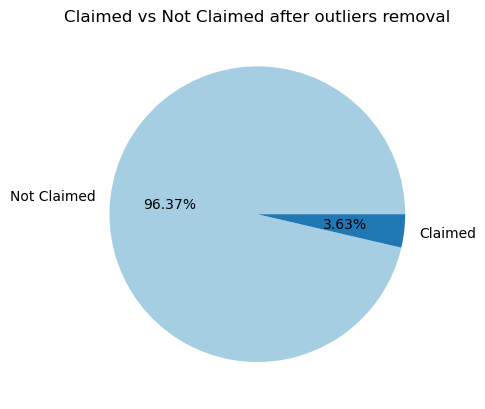

In [750]:
# check potential outliers drop if applied on train_df. Keep in mind: it's imbalanced dataset.

labels=["Not Claimed", "Claimed"]

claimed_or_not = train_df_dropped_outliers["target"].value_counts().tolist()
values = [claimed_or_not[0],claimed_or_not[1]]
colors = sns.color_palette("Paired")

plt.pie(values, labels=labels, colors=colors, autopct='%.2f%%')
plt.title("Claimed vs Not Claimed after outliers removal")
plt.show()

Target class proportions did not change to much extent compared against proportions before outliers removal:
1. Not claimed: 96.36% vs 96.41%
2. Claimed: 3.64% vs 3.59%

In [751]:
# dropping outliers in train_df
train_df = train_df.drop(outliers_to_drop, axis=0).reset_index(drop=True)

## Standarization before PCA

In [752]:
means = train_df.mean()
stds = train_df.std()

print("Means of features before standarization:\n", round(means,4))
print("\nStandard deviations of features before standarization:\n", round(stds,4))

Means of features before standarization:
 ps_ind_01          1.8983
ps_ind_02_cat      1.3601
ps_ind_03          4.4238
ps_ind_04_cat      0.4172
ps_ind_05_cat      0.4164
ps_ind_06_bin      0.3946
ps_ind_07_bin      0.2560
ps_ind_08_bin      0.1639
ps_ind_09_bin      0.1855
ps_ind_10_bin      0.0003
ps_ind_11_bin      0.0017
ps_ind_12_bin      0.0095
ps_ind_13_bin      0.0009
ps_ind_14          0.0125
ps_ind_15          7.3058
ps_ind_16_bin      0.6614
ps_ind_17_bin      0.1210
ps_ind_18_bin      0.1533
ps_reg_01          0.6104
ps_reg_02          0.4363
ps_reg_03          0.8445
ps_car_01_cat      8.2939
ps_car_02_cat      0.8321
ps_car_03_cat      0.8771
ps_car_04_cat      0.7059
ps_car_05_cat      0.7380
ps_car_06_cat      6.5379
ps_car_07_cat      0.9485
ps_car_08_cat      0.8322
ps_car_09_cat      1.3325
ps_car_10_cat      0.9921
ps_car_11_cat     62.1173
ps_car_11          2.3454
ps_car_12          0.3794
ps_car_13          0.8110
ps_car_14          0.3735
ps_car_15          3.0

In [753]:
# list of all columns in train_df, does not include target col
all_feature_cols = X_train.columns.to_list()
#print(all_cols)

In [754]:
# standarization
def fnStandardScaler(df, col_names):
    scaled_values = StandardScaler().fit_transform(df[col_names])
    df[col_names] = scaled_values
    return df

In [755]:
train_df = fnStandardScaler(train_df, all_feature_cols)
#X_train

In [756]:
# check if standarization was correctly applied

means = train_df.mean()
stds = train_df.std()

print("Means of standardized features:\n", round(means,4))
print("\nStandard deviations of standardized features:\n", round(stds,4))

Means of standardized features:
 ps_ind_01        -0.0000
ps_ind_02_cat     0.0000
ps_ind_03         0.0000
ps_ind_04_cat     0.0000
ps_ind_05_cat    -0.0000
ps_ind_06_bin    -0.0000
ps_ind_07_bin    -0.0000
ps_ind_08_bin     0.0000
ps_ind_09_bin     0.0000
ps_ind_10_bin     0.0000
ps_ind_11_bin    -0.0000
ps_ind_12_bin     0.0000
ps_ind_13_bin     0.0000
ps_ind_14         0.0000
ps_ind_15        -0.0000
ps_ind_16_bin     0.0000
ps_ind_17_bin     0.0000
ps_ind_18_bin     0.0000
ps_reg_01         0.0000
ps_reg_02         0.0000
ps_reg_03        -0.0000
ps_car_01_cat     0.0000
ps_car_02_cat    -0.0000
ps_car_03_cat    -0.0000
ps_car_04_cat    -0.0000
ps_car_05_cat    -0.0000
ps_car_06_cat    -0.0000
ps_car_07_cat    -0.0000
ps_car_08_cat     0.0000
ps_car_09_cat    -0.0000
ps_car_10_cat    -0.0000
ps_car_11_cat     0.0000
ps_car_11        -0.0000
ps_car_12         0.0000
ps_car_13        -0.0000
ps_car_14        -0.0000
ps_car_15         0.0000
ps_calc_01        0.0000
ps_calc_02       

In [757]:
# Split back into X_train and y_train
X_train = train_df.drop(columns=["target"])
y_train = train_df["target"]

In [758]:
y_train

0         1
1         0
2         0
3         0
4         0
         ..
474830    0
474831    0
474832    0
474833    0
474834    0
Name: target, Length: 474835, dtype: int64

## Principal Component Analysis

In [759]:
pca = PCA(n_components=20)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
# X_train_pca

## Model Training

Sample 2 algorithms used:
- Logistic Regression
- K Neighbors Classifier

#### Test data for model input

In [760]:
test_df = pd.concat([X_test,y_test], axis=1)
#test_df

In [761]:
# standarization of test data
test_df = fnStandardScaler(test_df, all_feature_cols)
#test_df

In [762]:
# Split back into X_test and y_test
X_test = test_df.drop(columns=["target"])
y_test = test_df["target"]

In [763]:
# PCA for X_test data
pca.fit(X_test)
X_test_pca = pca.transform(X_test)

#### Logistic Regression

In [764]:
model = LogisticRegression()

In [765]:
model.fit(X_train_pca, y_train);

In [766]:
# Check the class ordering
print("Classes:", model.classes_)

Classes: [0 1]


In [767]:
# y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test_pca)[:,1]

In [768]:
y_pred_prob

array([0.0365375 , 0.02905083, 0.03863829, ..., 0.02611375, 0.02759717,
       0.02378445])

In [769]:
logreg_log_loss = log_loss(y_test, y_pred_prob)
logreg_roc_auc = roc_auc_score(y_test, y_pred_prob)
logreg_brier_score = brier_score_loss(y_test, y_pred_prob)

#### K Neighbors Classifier

In [770]:
model = KNeighborsClassifier(n_neighbors=5)

In [771]:
model.fit(X_train_pca, y_train);

In [772]:
y_pred_prob = model.predict_proba(X_test_pca)[:,1]

In [773]:
knn_clf_log_loss = log_loss(y_test, y_pred_prob)
knn_clf_roc_auc = roc_auc_score(y_test, y_pred_prob)
knn_clf_brier_score = brier_score_loss(y_test, y_pred_prob)

## Model evaluation

In [774]:
models = pd.DataFrame({
    "Model":["Logistic Regression","K Neighbors Classifier"], 
    "Log Loss Score":[logreg_log_loss, knn_clf_log_loss],
    "ROC AUC Score":[logreg_roc_auc, knn_clf_roc_auc],
    "Brier Score":[logreg_brier_score, knn_clf_brier_score]
})
models

,Model,Log Loss Score,ROC AUC Score,Brier Score
0,Logistic Regression,0.154674,0.594524,0.034998
1,K Neighbors Classifier,1.121561,0.512611,0.041519
